### Question 1.
Write a program to populate and then sort a randomly distributed list of ten million integers,
each integer having a value >=1 and <=100 without using any built-in/ external library/function
for sorting.<p>
Your program should carefully consider the input and come up with the most efficient sorting
solution you can think of.<p>
Provide the space and time complexity of your algorithm

### Solution

In [1]:
# Importing library for selecting random integers between given range
from random import randint

# List of random generated number between 1 and 100
numbers_list = [randint(1,100) for i in range(0,10000000)]

# To store the occurence of give number initially it was assigned to "0" int value
num_occ = [0 for i in range(100)]

# Store the total count of each intergers to a num_acc list
for i in numbers_list:
    num_occ[i-1] += 1
    
# To store the final sorted list
sorted_list = []

# Counter start with 1
initial_number = 1

for i in num_occ:
    
    # To store the list of constant length of given integer i.e., no of occurance of given integer
    # Append the above sorted list of single element to final output
    sorted_list += [initial_number for j in range(i)]
    
    # Increment to counter for next number
    initial_number += 1

# Check if list is sorted or not
print(sorted_list== sorted(numbers_list))

True


<b>Time complexity (Auxillary Space):</b><p>
   => O(n) + O(m) + O(n) + O(m)*O(i)  Here n = 10000000 and m = 100 <p>
   => O(n) + O(m) + O(n) + O(m*i)<p>
   => O(n) + O(m*i)<p>
   => if m*i is equal to n, Best Case : O(n)<p>
   => otherwise, Worst Case : O(m*i)<p>
                
<b>Space Complexity: Auxillary space + Space used by inputs</b><p>
    Space used by input:<p>
    => O(n) + O(m) + O(n) + O(m)<p> 
    => O(n) because n >> m<p>
        
    So, Space Complexity in Best Case is O(n) and in Worst Case O(m*i)

### Question 2.

A/B Testing is a very common technique to evaluate effectiveness of changes in a user
interface. You show some users interface A (an existing design), and to others you show
interface B (a newer design), and then check if people search more with the new design or still
prefer the older design.<p>
The attached dataset “searches.json” contains data from one such A/B testing experiment.
Each line in this file represents data of one user’s interactions. The following data is collected
for each user:<p>
● uid: unique user id - users with an odd-numbered uid were shown the new design (B)<p>
● is_instructor: Instructors are testers or presenters who demonstrate search functionality
to prospective clients.<p>
● login_count: number of times the user logged in<p>
● search_count: number of times the user used the search feature<p>
Write a program that answers the questions:<p>
● Did more users use the search feature in the new design (B)?<p>
● Did users search more often in the new design (B)?<p>

### Solution

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
# Reading the json dataset file and setting index value to unique column uid
dataset = pd.read_json('searches.json',lines=True)

In [4]:
dataset.head()

,is_instructor,login_count,search_count,uid
0,True,1,2,6061521
1,False,4,0,11986457
2,False,1,0,15995765
3,True,3,0,9106912
4,False,1,0,9882383


In [5]:
stats.normaltest(dataset['login_count']).pvalue

9.820628220534376e-68

p >> 0.05. This is not a normal distribution

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


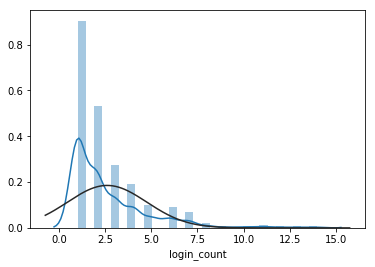

In [6]:
sns.distplot(dataset['login_count'], fit=stats.norm)

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


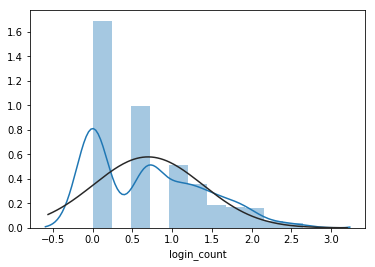

In [7]:
sns.distplot(np.log(dataset['login_count']), fit=stats.norm)

The number of search for login count is not normally distributed. Transforming does not make it look normal

Using any transformation does not make it normally distributed because mostly data is integer(zero) on other columns.

<b> So, Using Non-Parametric tests

#### Here i am using p-hacking for statistical analysis

In [8]:
# Users with odd uid were shown in design B
users_design_A = dataset[dataset['uid']%2==0]
users_design_B = dataset[dataset['uid']%2!=0]

Chi2 contigency test

In [9]:
# users who used search features atleast one time
design_B_nonzerocount = users_design_B[users_design_B['search_count']>0].count()
design_A_nonzerocount = users_design_A[users_design_A['search_count']>0].count()

# users who does not used search features
design_B_zerocount = users_design_B[users_design_B['search_count']==0].count()
design_A_zerocount = users_design_A[users_design_A['search_count']==0].count()

# Contigency table that contained observed frequency for each categories
observed_search_count2 = [[design_B_nonzerocount['uid'], design_B_zerocount['uid']], 
                             [design_A_nonzerocount['uid'], design_A_zerocount['uid']]]
chi2_test2 = stats.chi2_contingency(observed_search_count2)
print("P-value: ",chi2_test2[1])

P-value:  0.16762970944995664


Mann–Whitney U test

In [10]:
mwu_test = stats.mannwhitneyu(users_design_A['search_count'], users_design_B['search_count']).pvalue
mwu_test

0.07059103623543486

###### Solution (a) - No
P-value > 0.05
Null hypothesis is not rejected.
Features are independent. Therefore, <b>no increase in search feature on using new design(B).<b>

Analysing the data gave me the insight that users does not gave useful information on new search features. May be Instructors does not show the search features to clients because it was not relevant to them.

I am repeating the above hypothesis only at instructors.

In [11]:
# Filtering the dataset by considering instructor shown the features
instructor_design_A = users_design_A[users_design_A['is_instructor'] == True]
instructor_design_B = users_design_B[users_design_B['is_instructor'] == True]

Chi2 contigency test

In [12]:
# users who used search features atleast one time
design_B_nonzerocount = instructor_design_B[instructor_design_B['search_count']>0].count()
design_A_nonzerocount = instructor_design_A[instructor_design_A['search_count']>0].count()

# users who does not used search features
design_B_zerocount = instructor_design_B[instructor_design_B['search_count']==0].count()
design_A_zerocount = instructor_design_A[instructor_design_A['search_count']==0].count()

# Contigency table that contained observed frequency for each categories
observed_search_count2 = [[design_B_nonzerocount['uid'], design_B_zerocount['uid']], 
                             [design_A_nonzerocount['uid'], design_A_zerocount['uid']]]
chi2_test2 = stats.chi2_contingency(observed_search_count2)
print("P-value: ",chi2_test2[1])

P-value:  0.052001632770999166


Mann–Whitney U test

In [13]:
mwu_test_instructor = stats.mannwhitneyu(instructor_design_A['search_count'], instructor_design_B['search_count']).pvalue
mwu_test_instructor

0.022479717008052572

###### Solution (b) - No
P-value < 0.05
Null hypothesis is rejected.
Features are dependent. Therefore, <b>instructor search more often new design(B).<b>